In [39]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.special import legendre
from scipy.special import jv
from scipy.misc import derivative
from scipy.integrate import quad, dblquad, nquad

## Minimization

In [2]:
def f(x):
  return (x - 3)**2

result = minimize(f, 2)

In [3]:
print(result)
print(result.x)
#It's a method.

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3
[2.99999999]


In [4]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({"type": "ineq", "fun": lambda x: x[0] - 2*x[1] + 2},
        {"type": "ineq", "fun": lambda x: -x[0] - 2*x[1] + 6},
        {"type": "ineq", "fun": lambda x: -x[0] + 2*x[1] + 2}
       )

bnds = ((0, None), (0, None))

result = minimize(f, (2, 0), bounds=bnds, constraints=cons)

#### You can view x[0] as x, and x[1] as y.

In [5]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

## Interpolate

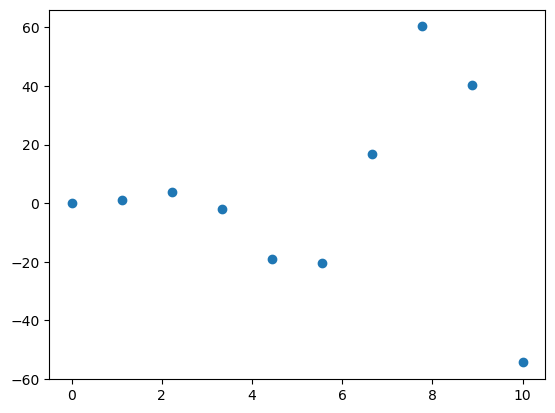

In [11]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)

#### np.linspace(start, stop, num)

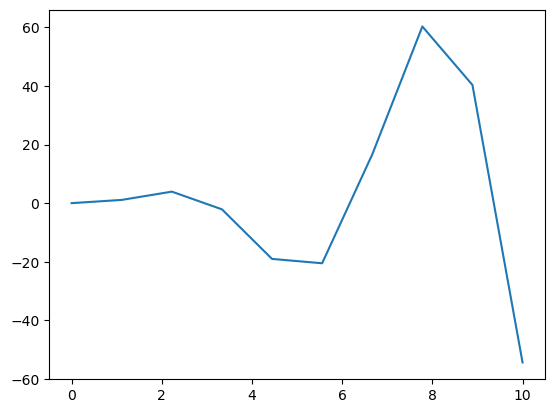

In [13]:
f = interp1d(x, y, kind="linear")
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense)

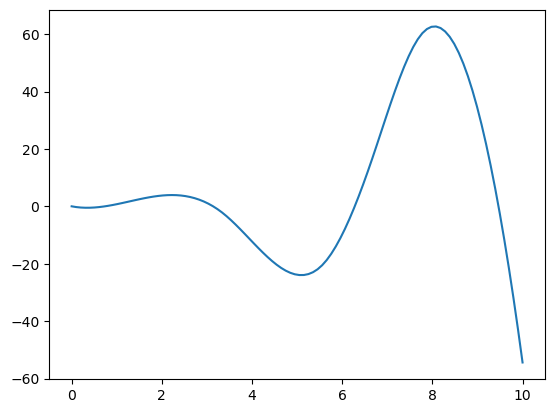

In [14]:
f = interp1d(x, y, kind="cubic")
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense)

## Curve Fitting

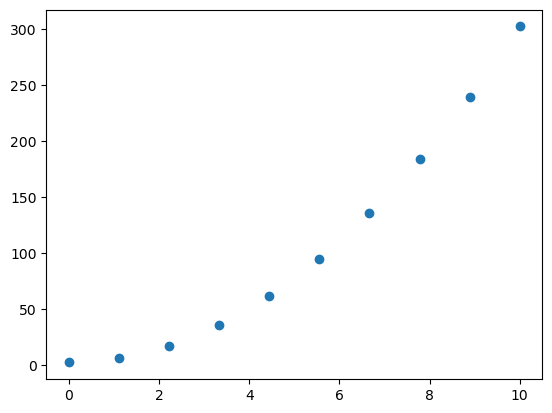

In [16]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

plt.scatter(x_data, y_data)

### y = ax^2 + b

In [18]:
def func(x, a, b):
    return a*(x**2) + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1))

In [19]:
popt

array([3., 2.])

#### It means a equals 3, b equals 2.

In [20]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

#### 更具體地說，對角線上的元素越大，表示對應參數的估計不確定性越高，而非對角線上的元素表示兩個參數之間的相關性，相關性越高，則兩個參數之間的變化更可能是相關的。

In [21]:
np.sqrt(np.diag(pcov))


array([2.03297155e-17, 9.82788028e-16])

#### 參數誤差

## Special Functions

### Legendre Polynomials
### (1 - x)^2 * y'' - 2xy + l(l + 1)y = 0

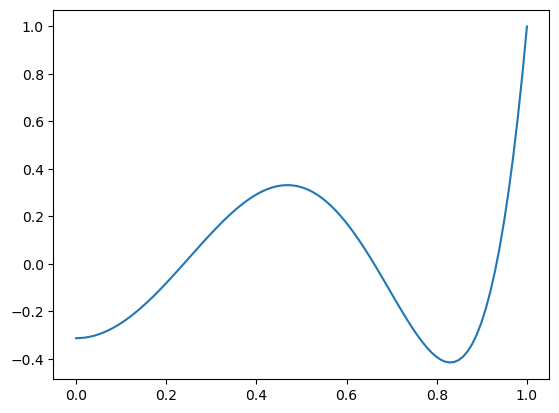

In [24]:
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))

### Bassel function
### x^2*y'' + xy' + (x^2 - a^2)y = 0 

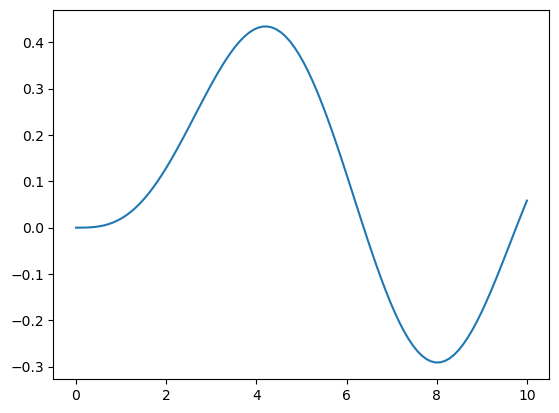

In [27]:
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))

## Differentiation

In [29]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

C:\Users\coset\AppData\Local\Temp\ipykernel_12088\2080230970.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
C:\Users\coset\AppData\Local\Temp\ipykernel_12088\2080230970.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


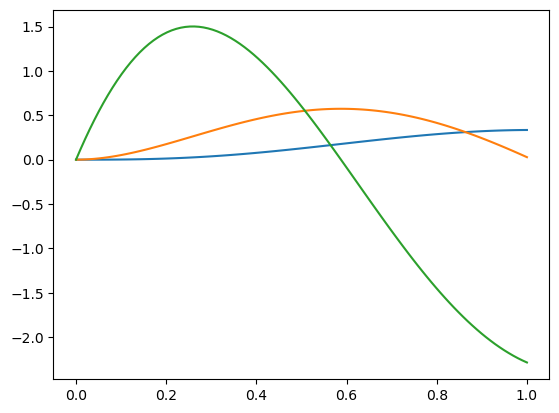

In [30]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

#### derivative(function, x_range, dx, n=(times))

## Intergration

In [32]:
integrand = lambda x: x**2 * np.sin(x) *np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [33]:
print(integral)

0.10246777930717413


In [34]:
print(integral_error)

1.1376208786903388e-15


### Double integrals

In [36]:
integrand = lambda x, y: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [37]:
integral

0.315802507240474

In [38]:
integral_error

1.5634600713498928e-14

In [40]:
nquad?